In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

In [2]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

데이터 불러오기 및 탐색

In [3]:
#  데이터 불러오기
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)

(614, 13)


Categorical Variable

In [5]:
# Loan_ID
df.Loan_ID.isna().sum()

0

In [6]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [7]:
# Gender
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\2526101917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='hls')


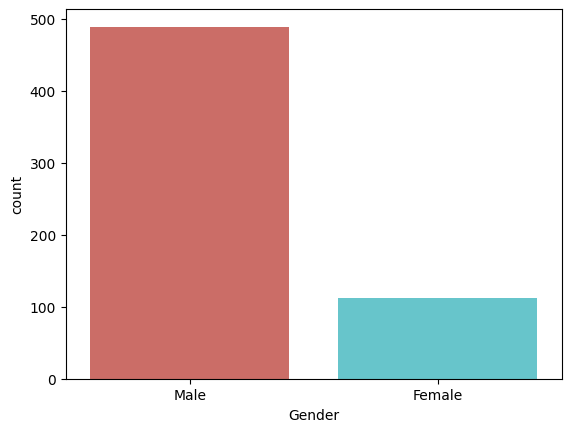

In [8]:
# 막대그래프로 관측치 개수 표시
sns.countplot(x='Gender', data=df, palette='hls')
plt.show()

In [9]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull =  len(df[df.Gender.isnull()])

print('Percentage of Male applicant : {:.2f}%'.format((countMale / (len(df.Gender)) * 100)))
print('Percentage of Female applicant : {:.2f}%'.format((countFemale / (len(df.Gender)) * 100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Gender)) * 100)))

Percentage of Male applicant : 79.64%
Percentage of Female applicant : 18.24%
Missing values percentage : 2.12%


In [10]:
# Married
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3977329931.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='Set2')


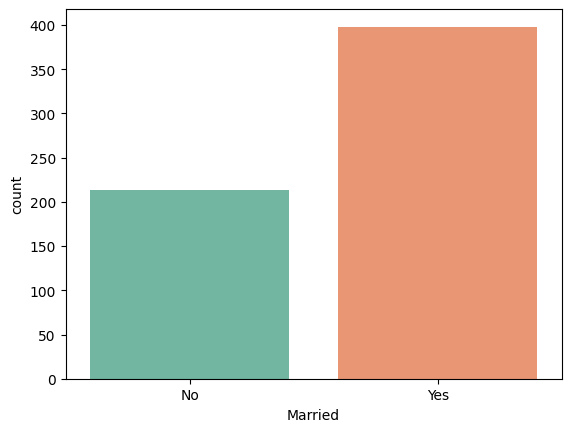

In [11]:
sns.countplot(x='Married', data=df, palette='Set2')
plt.show()

In [12]:
countMarried = len(df[df.Married =='Yes'])
countNotMarried = len(df[df.Married =='No'])
countNull = len(df[df.Married.isnull()])

print('Percentage of Married applicant : {:.2f}%'.format((countMarried / (len(df.Married))*100)))
print('Percentage of Not Married applicant : {:.2f}%'.format((countNotMarried / (len(df.Married))*100)))
print('Missing Values percentage : {:.2f}%'.format((countNull / (len(df.Married))*100)))

Percentage of Married applicant : 64.82%
Percentage of Not Married applicant : 34.69%
Missing Values percentage : 0.49%


In [13]:
# Education
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\1186420809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set3')


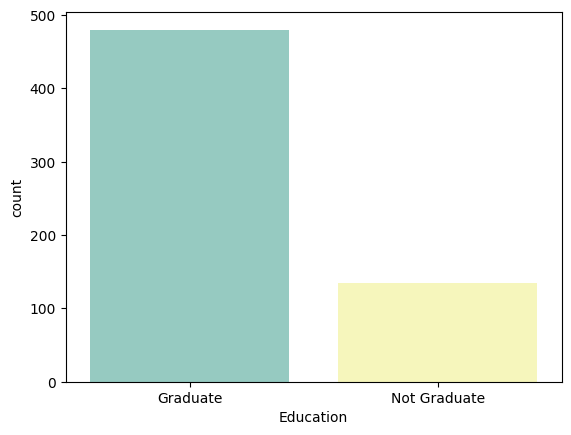

In [14]:
sns.countplot(x='Education', data=df, palette='Set3')
plt.show()

In [15]:
countGraduate= len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education =='Not Graduate'])
countNull  = len(df[df.Education.isnull()])

print('Percentage of Graduate applicant : {:.2f}%'.format((countGraduate / (len(df.Education))*100)))
print('Percentage of Not Graduate applicant : {:.2f}%'.format((countNotGraduate / (len(df.Education))*100)))
print('Missing values percengate : {:.2f}%'.format((countNull / (len(df.Education)) * 100)))

Percentage of Graduate applicant : 78.18%
Percentage of Not Graduate applicant : 21.82%
Missing values percengate : 0.00%


In [16]:
# Self_Employed
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\1018191277.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette ='crest')


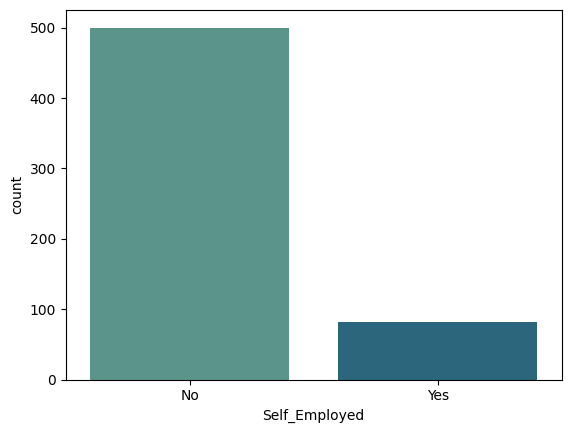

In [17]:
sns.countplot(x='Self_Employed', data=df, palette ='crest')
plt.show()

In [18]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed =='Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print('Percentage of Not self_employed : {:.2f}%'.format((countNo / (len(df.Self_Employed))*100)))
print('Percentage of self_employed  : {:.2f}%'.format((countYes / (len(df.Self_Employed))*100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self_employed : 81.43%
Percentage of self_employed  : 13.36%
Missing values percentage : 5.21%


In [19]:
# Credit History
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\2497569024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette='RdGy')


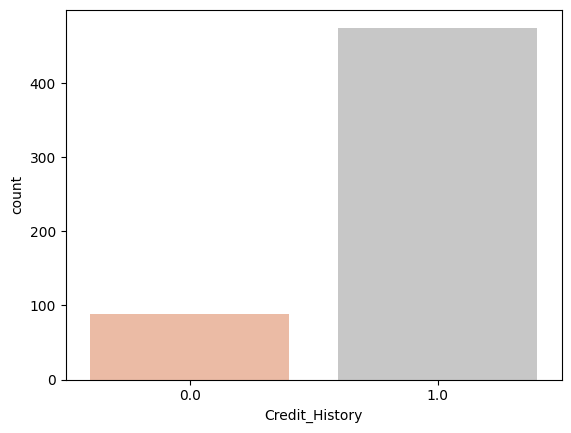

In [20]:
sns.countplot(x='Credit_History', data=df, palette='RdGy')
plt.show()

In [21]:
count1 = len(df[df.Credit_History ==1])
count2 = len(df[df.Credit_History ==0])
countNull = len(df[df.Credit_History.isnull()])

print('Percentage of Good credit history : {:.2f}%'.format((count1 / (len(df.Credit_History))*100)))
print('Percentage of Bad credit history : {:.2f}%'.format((count2 / (len(df.Credit_History))*100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history : 77.36%
Percentage of Bad credit history : 14.50%
Missing values percentage : 8.14%


In [22]:
# Property_Area
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\1873891587.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property_Area', data=df, palette='cubehelix')


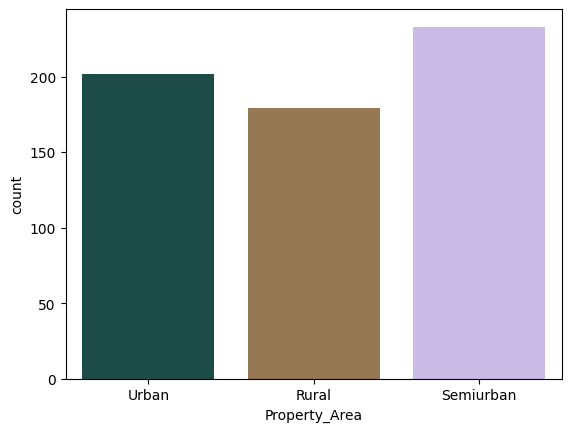

In [23]:
sns.countplot(x='Property_Area', data=df, palette='cubehelix')
plt.show()

In [24]:
countUrban = len(df[df.Property_Area == 'Urban'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countRural = len(df[df.Property_Area == 'Rural'])
countNull = len(df[df.Property_Area.isnull()])

print('Percentage of Unban :{:.2f}%'.format((countUrban / (len(df.Property_Area))*100)))
print('Percentage of Semiurban : {:.2f}%'.format((countSemiurban / (len(df.Property_Area))*100)))
print('Percentage of Rural : {:.2f}%'.format((countRural / (len(df.Property_Area))*100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Property_Area))*100)))

Percentage of Unban :32.90%
Percentage of Semiurban : 37.95%
Percentage of Rural : 29.15%
Missing values percentage : 0.00%


In [25]:
# Loan Status
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\833038137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='BrBG')


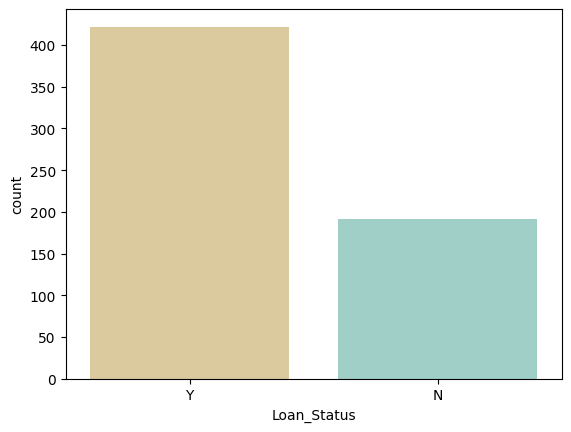

In [26]:
sns.countplot(x='Loan_Status', data=df, palette='BrBG')
plt.show()

In [27]:
countY=len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print('Percentage of Approved : {:.2f}%'.format((countY / (len(df.Loan_Status))*100)))
print('Percentage of Rejected : {:.2f}%'.format((countN / (len(df.Loan_Status))*100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved : 68.73%
Percentage of Rejected : 31.27%
Missing values percentage : 0.00%


In [28]:
# Loan Amount Term
df.Loan_Amount_Term.value_counts(dropna =False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\4052820983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Amount_Term', data=df, palette = 'PuOr')


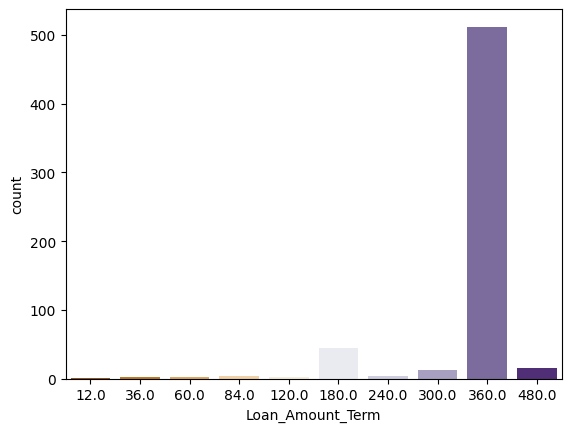

In [29]:
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'PuOr')
plt.show()

In [30]:
count12= len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300= len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print('Percentage of 12 : {:.2f}%'.format((count12 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 36 : {:.2f}%'.format((count36 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 60 : {:.2f}%'.format((count60 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 84 : {:.2f}%'.format((count84 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 120 : {:.2f}%'.format((count120 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 180 : {:.2f}%'.format((count180 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 240 : {:.2f}%'.format((count240 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 300 : {:.2f}%'.format((count300 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 360 : {:.2f}%'.format((count360 / (len(df.Loan_Amount_Term))*100)))
print('Percentage of 480 : {:.2f}%'.format((count480 / (len(df.Loan_Amount_Term))*100)))
print('Missing values percentage : {:.2f}%'.format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12 : 0.16%
Percentage of 36 : 0.33%
Percentage of 60 : 0.33%
Percentage of 84 : 0.65%
Percentage of 120 : 0.49%
Percentage of 180 : 7.17%
Percentage of 240 : 0.65%
Percentage of 300 : 2.12%
Percentage of 360 : 83.39%
Percentage of 480 : 2.44%
Missing values percentage : 2.28%


Numerical Variable

In [31]:
# describe Numerical Variable
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

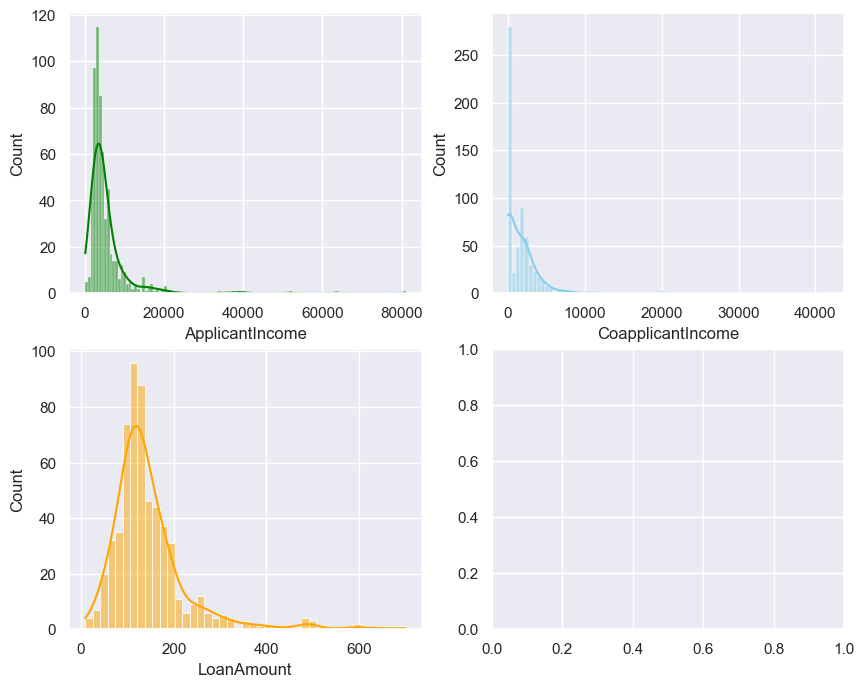

In [32]:
# Distribution of Numerical Variable
sns.set(style = 'darkgrid')
fig, axs = plt.subplots(2,2,figsize =(10,8))

sns.histplot(data =df, x='ApplicantIncome',kde =True, ax=axs[0,0], color ='green')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=axs[0,1], color = 'skyblue')
sns.histplot(data=df, x='LoanAmount', kde = True, ax=axs[1,0], color ='orange')

<Axes: ylabel='LoanAmount'>

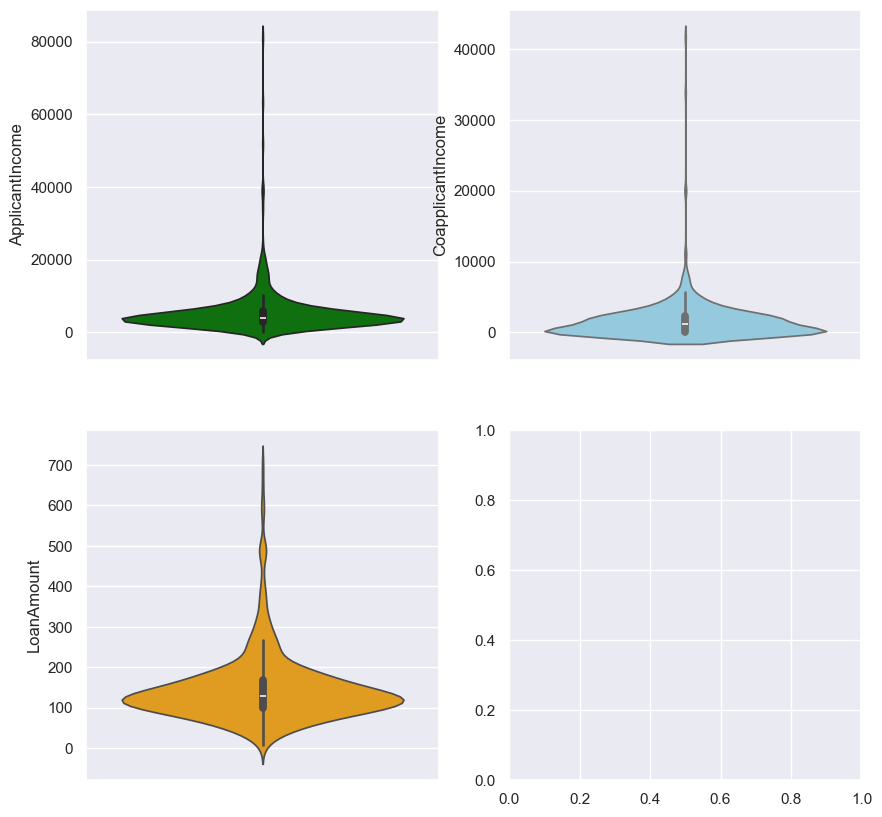

In [33]:
sns.set(style = 'darkgrid')
fig, axs1 = plt.subplots(2,2,figsize=(10,10))

sns.violinplot(data=df, y='ApplicantIncome', ax=axs1[0,0], color='green')
sns.violinplot(data=df, y='CoapplicantIncome', ax= axs1[0,1], color='skyblue')
sns.violinplot(data=df, y='LoanAmount', ax=axs1[1,0], color='orange')

Categorical - Numerical

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3678739224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='mako')


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

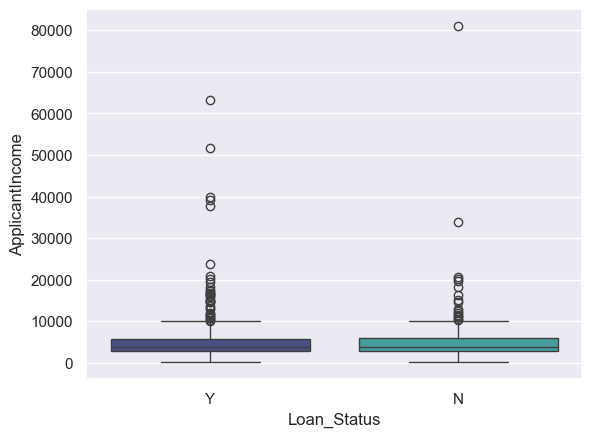

In [34]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='mako')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\883446904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoapplicantIncome', y='Loan_Status', data=df, palette='rocket')


<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

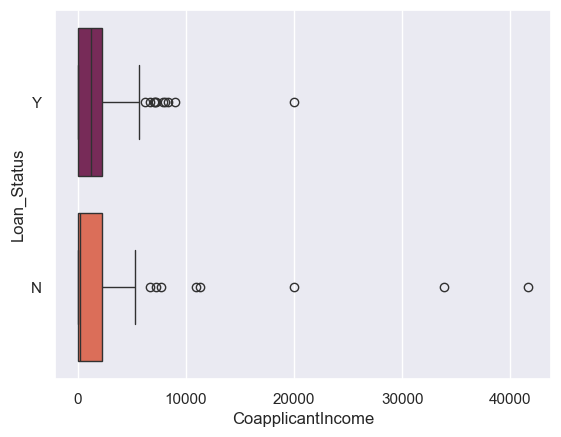

In [35]:
sns.boxplot(x='CoapplicantIncome', y='Loan_Status', data=df, palette='rocket')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3556312588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Accent')


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

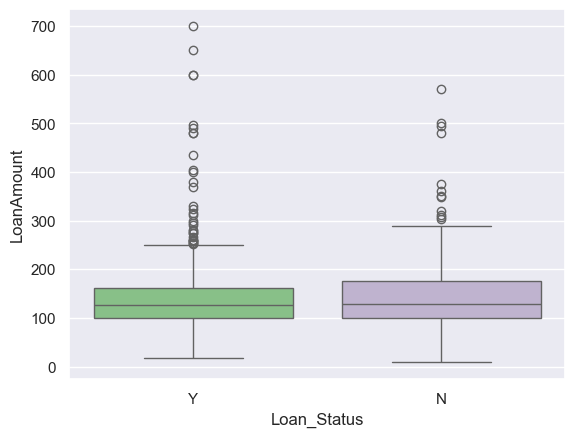

In [36]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Accent')

Null Values

In [37]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

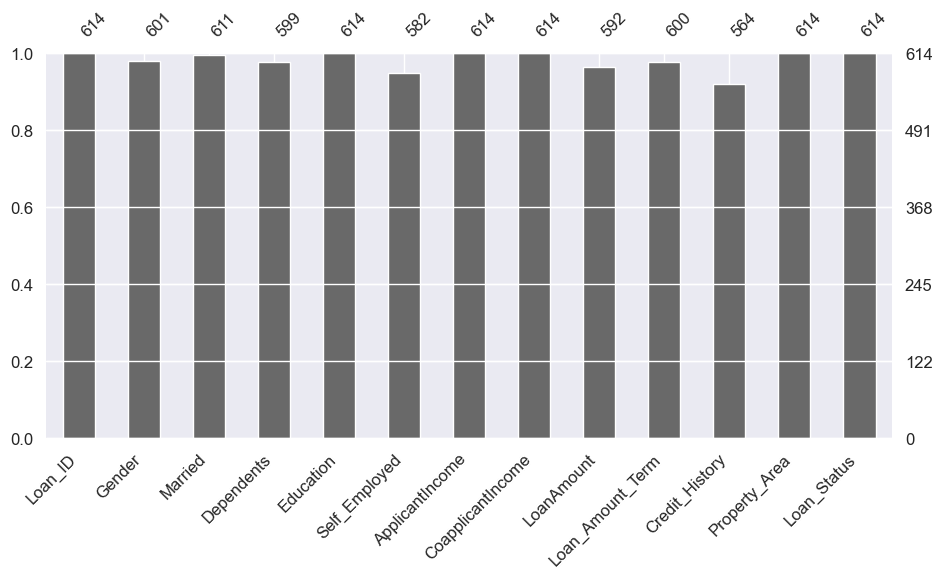

In [38]:
plt.figure(figsize=(24,5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax=axz, fontsize=12)

Data PreProcessing

In [39]:
# drop unecessary variables
df = df.drop(['Loan_ID'], axis =1)

In [40]:
# Data Imputation_최빈값으로 대체
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3306810908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3306810908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [41]:
# 평균값으로 대체
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3837310651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


One-hot-Encoding

In [42]:
# 범주형 열에 대한 더미 변수를 생성하고 원-핫 인코딩을 사용하여 이진으로 변환. 
df= pd.get_dummies(df)

# drop columns_다중공선성 문제방지하기 위해 각 범주형 특성에 대해 더미 변수 중 하나를 삭제.
df = df.drop(['Gender_Female', 'Married_No','Education_Not Graduate', 'Self_Employed_No','Loan_Status_N'], axis=1)

# rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married','Education_Graduate': 'Education','Self_Employed_Yes':'Self_Employed', 'Loan_Status_Y':'Loan_Status'}
df.rename(columns=new, inplace=True)

In [43]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


# remove outliers &infinite values
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#  이상값이 포함된 행 제외 
df = df[~((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

In [44]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


In [45]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [46]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

In [47]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
5,5417,4196.0,267.0,360.0,1.0,True,True,False,False,True,False,True,True,False,False,True,True
6,2333,1516.0,95.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True


In [48]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,453.000000,453.000000,453.000000,453.000000,453.000000
mean,3431.653422,1457.300044,119.806142,344.238411,0.849890
std,1101.381070,1410.213244,41.588295,64.930566,0.357574
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,96.000000,360.000000,1.000000
50%,3333.000000,1500.000000,119.000000,360.000000,1.000000
75%,4180.000000,2333.000000,144.000000,360.000000,1.000000
max,5821.000000,5701.000000,311.000000,480.000000,1.000000


In [49]:
# Q1 = df['LoanAmount'].quantile(0.25)
# Q3 = df['LoanAmount'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 1 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          453 non-null    int64  
 1   CoapplicantIncome        453 non-null    float64
 2   LoanAmount               453 non-null    float64
 3   Loan_Amount_Term         453 non-null    float64
 4   Credit_History           453 non-null    float64
 5   Gender                   453 non-null    bool   
 6   Married                  453 non-null    bool   
 7   Dependents_0             453 non-null    bool   
 8   Dependents_1             453 non-null    bool   
 9   Dependents_2             453 non-null    bool   
 10  Dependents_3+            453 non-null    bool   
 11  Education                453 non-null    bool   
 12  Self_Employed            453 non-null    bool   
 13  Property_Area_Rural      453 non-null    bool   
 14  Property_Area_Semiurban  453 no

In [51]:
# Skewed Distribution Treatment_분포를 정규화 하기 위해 제곱근 변환 사용
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)


<Axes: xlabel='LoanAmount', ylabel='Count'>

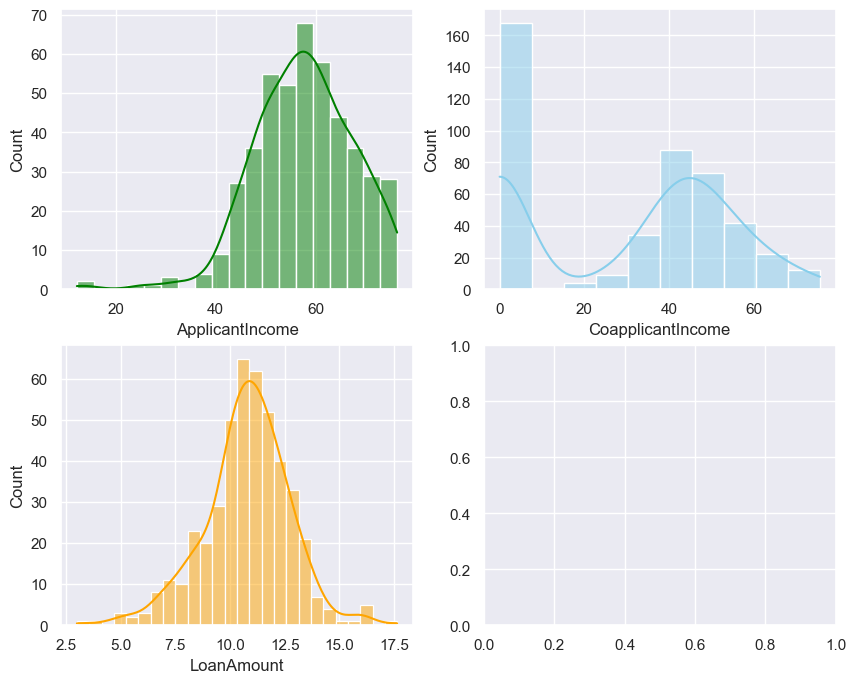

In [52]:
sns.set(style = 'darkgrid')
fig, axs = plt.subplots(2,2, figsize = (10,8))

sns.histplot(data = df, x='ApplicantIncome', kde=True, ax=axs[0,0], color='green')
sns.histplot(data = df, x='CoapplicantIncome',kde = True, ax=axs[0,1], color='skyblue')
sns.histplot(data = df, x='LoanAmount', kde = True, ax=axs[1,0], color ='orange')

In [53]:
# Features Separating
X= df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

In [54]:
# 데이터 불균형 해결_ SMOTE 알고리즘
X, y =SMOTE().fit_resample(X,y)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\1608317372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette='coolwarm')


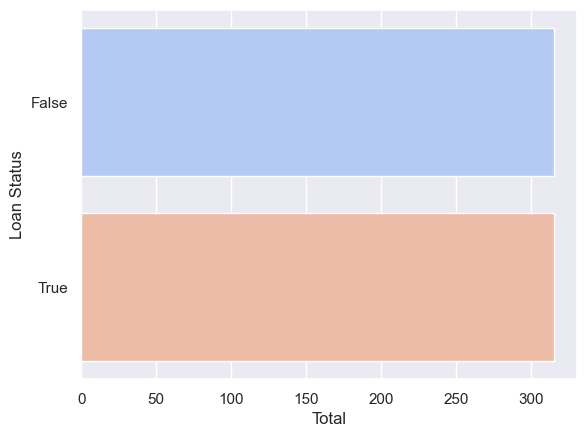

In [55]:
sns.set_theme(style ='darkgrid')
sns.countplot(y=y, data=df, palette='coolwarm')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [56]:
y.value_counts()

Loan_Status
False    315
True     315
Name: count, dtype: int64

In [57]:
# Data Normalization
X= MinMaxScaler().fit_transform(X)

In [58]:
# Splitting Data Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =0)

Model

In [59]:
# Logistic Regression

LRclassifier = LogisticRegression(solver ='saga', max_iter = 500, random_state =1)
LRclassifier.fit(X_train, y_train)

# 목표변수 예측
y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy : {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.91      0.75      0.83        57
        True       0.82      0.94      0.88        69

    accuracy                           0.86       126
   macro avg       0.87      0.85      0.85       126
weighted avg       0.86      0.86      0.86       126

[[43 14]
 [ 4 65]]
LR accuracy : 85.71%


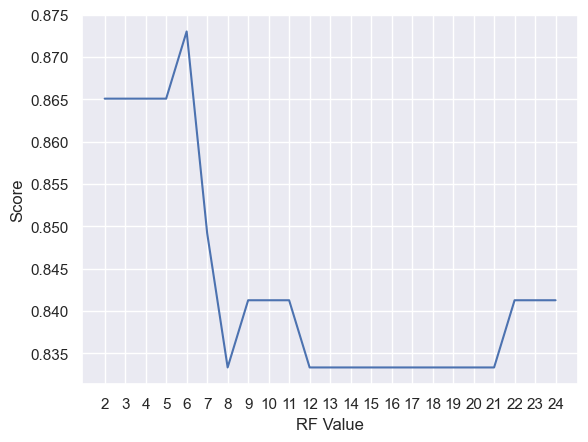

Random Forest Accuracy : 87.30%


In [60]:
# Random Forest

scoreListRF =[]
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state =1, max_leaf_nodes =i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel('RF Value')
plt.ylabel('Score')
plt.show()
RFAcc = max(scoreListRF)
print('Random Forest Accuracy : {:.2f}%'.format(RFAcc*100))

In [61]:
# Gradient Boosting
paramsGB = {'n_estimators': [100,200,300,400,500],
            'max_depth': [1,2,3,4,5],
            'subsample':[0.5,1],
            'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [62]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv = 20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [63]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)


GradientBoostingClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=300,
                           subsample=1)
0.8433076923076925
{'subsample': 1, 'n_estimators': 300, 'max_leaf_nodes': 10, 'max_depth': 5}
7


In [64]:
GBclassifier = GradientBoostingClassifier(subsample =0.5, n_estimators = 400, max_depth =4, max_leaf_nodes =10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred, y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.82      0.82      0.82        57
        True       0.86      0.86      0.86        69

    accuracy                           0.84       126
   macro avg       0.84      0.84      0.84       126
weighted avg       0.84      0.84      0.84       126

[[47 10]
 [10 59]]
Gradient Boosting accuracy: 84.13%


In [65]:
# Naive Bayes Classifier
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)
NBAcc = accuracy_score(y_pred, y_test)
print('Naive Bayes accuracy : {:.2f}%'.format(NBAcc*100))

Naive Bayes accuracy : 80.95%


In [69]:
# XGBClassifier
from xgboost import XGBClassifier

XGBclassifier = XGBClassifier(n_estimators = 400, learning_rate = 0.2, max_depth=4, random_state = 1)
XGBclassifier.fit(X_train, y_train)

y_pred = XGBclassifier.predict(X_test)
XGBAcc = accuracy_score(y_pred, y_test)
print('XGBoost accuracy : {:.2f}%'.format(XGBAcc*100))

XGBoost accuracy : 86.51%


In [72]:
# Support Vector Machine(SVM)
SVCclassifier = SVC(kernel='rbf', max_iter = 500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)
SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy : {:.2f}%'.format(SVCAcc*100))

SVC accuracy : 88.10%


Model Comparison_

In [73]:
compare = pd.DataFrame({'Model': ['Logistic Regression','Random Forest', 'Gradient Boost', 'Naive Bayes Classifier','XGBoost','SVM'],
                        'Accuracy':[LRAcc*100, RFAcc*100, GBAcc*100, NBAcc*100, XGBAcc*100, SVCAcc*100]})
compare.sort_values(by ='Accuracy', ascending=False)

,Model,Accuracy
5,SVM,88.095238
1,Random Forest,87.301587
4,XGBoost,86.507937
0,Logistic Regression,85.714286
2,Gradient Boost,84.126984
3,Naive Bayes Classifier,80.952381


Test Data

In [138]:
df_t =  pd.read_csv('loan-test.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [139]:
df_t.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [140]:
df_t = df_t.drop(['Loan_ID'], axis=1)

In [141]:
df_t['Gender'].fillna(df_t['Gender'].mode()[0], inplace = True)
df_t['Dependents'].fillna(df_t['Dependents'].mode()[0], inplace = True)
df_t['Self_Employed'].fillna(df_t['Self_Employed'].mode()[0], inplace = True)
df_t['Loan_Amount_Term'].fillna(df_t['Loan_Amount_Term'].mode()[0], inplace =True)
df_t['Credit_History'].fillna(df_t['Credit_History'].mode()[0], inplace = True)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\2627733708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t['Gender'].fillna(df_t['Gender'].mode()[0], inplace = True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\2627733708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [142]:
df_t['LoanAmount'].fillna(df_t['LoanAmount'].mean(), inplace = True)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6560\3573183635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t['LoanAmount'].fillna(df_t['LoanAmount'].mean(), inplace = True)


In [143]:
df_t.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [145]:
df_t = pd.get_dummies(df_t)

df_t = df_t.drop(['Gender_Female', 'Married_No','Education_Not Graduate', 'Self_Employed_No'], axis=1)

new_t = {'Gender_Male': 'Gender', 'Married_Yes': 'Married','Education_Graduate': 'Education','Self_Employed_Yes':'Self_Employed'}
df_t.rename(columns = new_t, inplace = True)

In [148]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender                   367 non-null    bool   
 6   Married                  367 non-null    bool   
 7   Dependents_0             367 non-null    bool   
 8   Dependents_1             367 non-null    bool   
 9   Dependents_2             367 non-null    bool   
 10  Dependents_3+            367 non-null    bool   
 11  Education                367 non-null    bool   
 12  Self_Employed            367 non-null    bool   
 13  Property_Area_Rural      367 non-null    bool   
 14  Property_Area_Semiurban  3

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 1 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          453 non-null    float64
 1   CoapplicantIncome        453 non-null    float64
 2   LoanAmount               453 non-null    float64
 3   Loan_Amount_Term         453 non-null    float64
 4   Credit_History           453 non-null    float64
 5   Gender                   453 non-null    bool   
 6   Married                  453 non-null    bool   
 7   Dependents_0             453 non-null    bool   
 8   Dependents_1             453 non-null    bool   
 9   Dependents_2             453 non-null    bool   
 10  Dependents_3+            453 non-null    bool   
 11  Education                453 non-null    bool   
 12  Self_Employed            453 non-null    bool   
 13  Property_Area_Rural      453 non-null    bool   
 14  Property_Area_Semiurban  453 no

In [166]:
test_x = MinMaxScaler().fit_transform(df_t)

In [169]:
pred = SVCc.predict(test_x)

In [170]:
pred

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
       False,  True,

In [171]:
df_t['Loan_Status_pred'] = pred

In [172]:
df_t.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_pred
0,5720,0,110.0,360.0,1.0,True,True,True,False,False,False,True,False,False,False,True,True
1,3076,1500,126.0,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True
2,5000,1800,208.0,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True,True


In [173]:
df_t.to_csv('E:/더조은/프로젝트/미니/loan-test-pred.csv', index= False)

In [174]:
pd.read_csv('E:/더조은/프로젝트/미니/loan-test-pred.csv')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_pred
0,5720,0,110.0,360.0,1.0,True,True,True,False,False,False,True,False,False,False,True,True
1,3076,1500,126.0,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True
2,5000,1800,208.0,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True,True
3,2340,2546,100.0,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True,True
4,3276,0,78.0,360.0,1.0,True,False,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,True,True,False,False,False,True,False,True,False,False,True,True
363,4158,709,115.0,360.0,1.0,True,True,True,False,False,False,True,False,False,False,True,True
364,3250,1993,126.0,360.0,1.0,True,False,True,False,False,False,True,False,False,True,False,True
365,5000,2393,158.0,360.0,1.0,True,True,True,False,False,False,True,False,True,False,False,True
